<a href="https://colab.research.google.com/github/marlcin2004-dev/Biomass_deterministic_modeling/blob/main/notebooks/domain_changes_Mod_Det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Klonujemy repo
!git clone https://github.com/marlcin2004-dev/Biomass_deterministic_modeling.git
%cd Biomass_deterministic_modeling
import sys
sys.path.append("./pipeline")

Cloning into 'Biomass_deterministic_modeling'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 84 (delta 27), reused 44 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 1.14 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/Biomass_deterministic_modeling


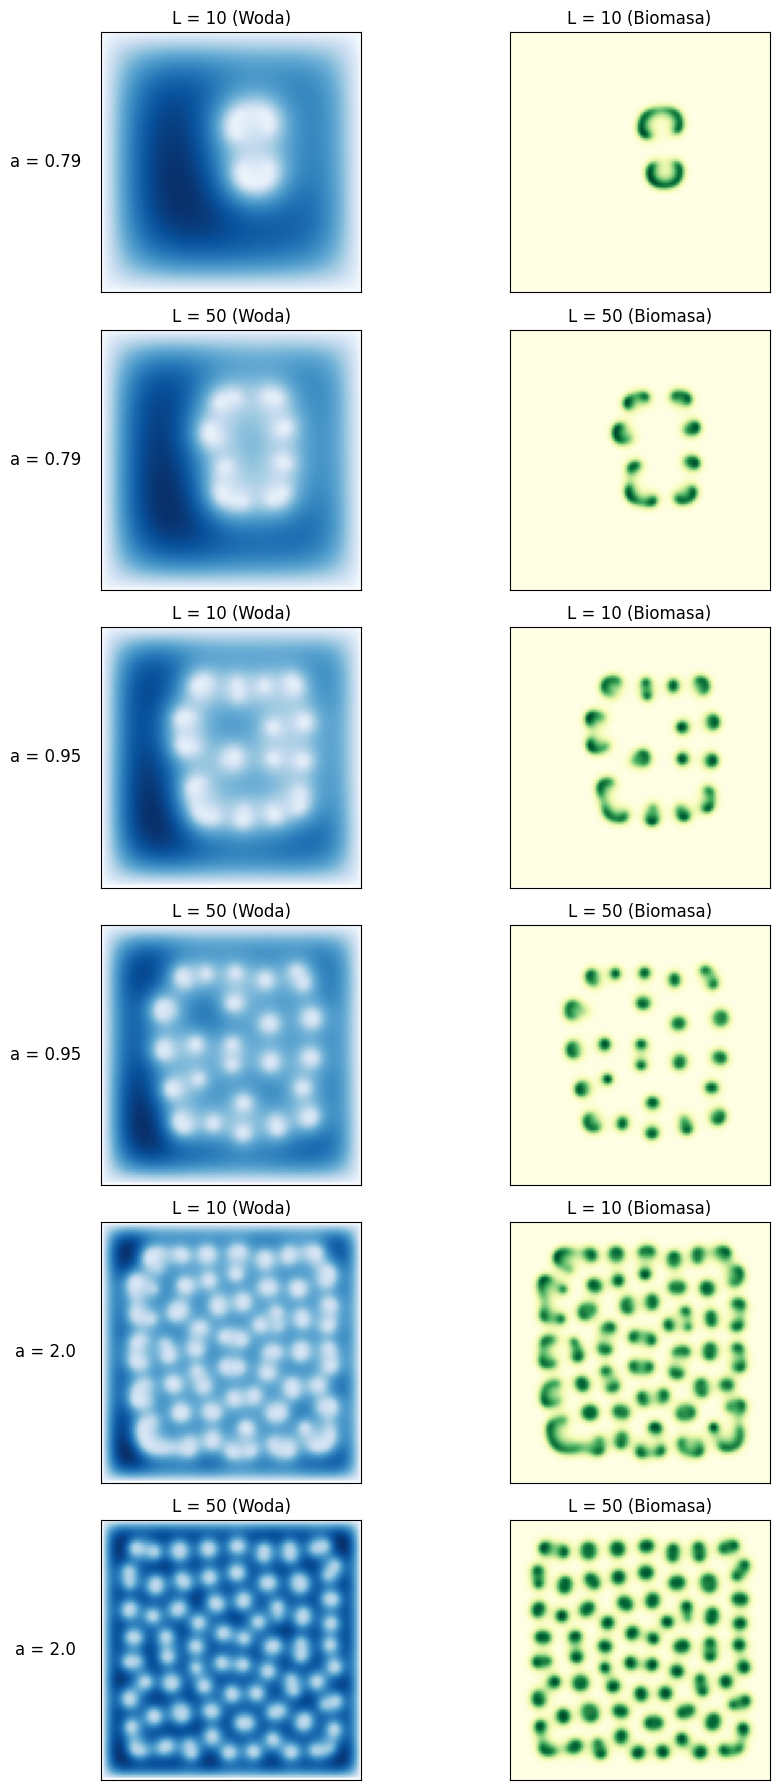

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from Klausmeier import KlausmeierModel
from domain_experiment import analyze_biomass_vs_size, stationary_v

# Wyznaczanie Obrazków Dla Różnych Dziedzin

Nx, Ny = 100, 100


params = dict(
    a = 1.2,
    d1=80,
    d2=0.1,
    m=0.45,
    Lx=50, Ly=50,
    Nx=Nx, Ny=Ny
)

model = KlausmeierModel( **params)

# ---- WARUNKI POCZĄTKOWE ----
u0 = 2.0 * np.ones(Nx * Ny)
v0 = 2.0 * np.ones(Nx * Ny) + 0.05 * np.random.randn(Nx * Ny)
u0[model.boundary] = 0.0
v0[model.boundary] = 0.0

model.u = u0
model.v = v0

a_values = [0.79, 0.95, 2.0]
L_values = [10, 50]

n_rows = len(a_values) * len(L_values)
fig, axs = plt.subplots(n_rows, 2, figsize=(10, 3 * n_rows))

row = 0

for a in a_values:
    for L in L_values:
        # ustawiamy parametry modelu
        model.a = a
        model.L = L

        u, v = model.run()

        # --- Woda ---
        im1 = axs[row, 0].imshow(u, origin="lower", cmap="Blues")
        axs[row, 0].set_title(f"L = {L} (Woda)")
        axs[row, 0].set_xticks([])
        axs[row, 0].set_yticks([])

        # --- Biomasa ---
        im2 = axs[row, 1].imshow(v, origin="lower", cmap="YlGn")
        axs[row, 1].set_title(f"L = {L} (Biomasa)")
        axs[row, 1].set_xticks([])
        axs[row, 1].set_yticks([])

        # Napis z wartością a po lewej stronie wiersza
        axs[row, 0].set_ylabel(f"a = {a}", fontsize=12, rotation=0, labelpad=40, va='center')

        row += 1

plt.tight_layout()
plt.show()

100%|██████████| 25/25 [01:15<00:00,  3.02s/it]


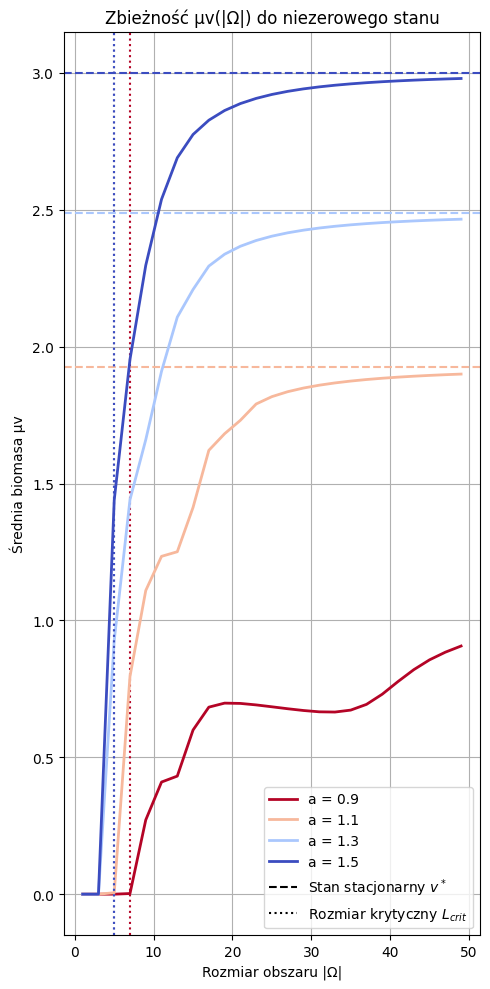

In [3]:
# Wykres pokazujący funkcję średniej biomasy

# Parametry

Nx, Ny = 10, 10
a_values = [0.9, 1.1, 1.3, 1.5]

base_params = dict(
    d1=1,
    d2=0.1,
    m=0.45,
    Nx=Nx,
    Ny=Ny
)

start, end, step = 1, 50, 2
cmap = plt.get_cmap('coolwarm_r')
norm = mcolors.Normalize(vmin=min(a_values), vmax=max(a_values))

plt.figure(figsize=(5, 10))

for a in a_values:
    line_color = cmap(norm(a))

    params = base_params.copy()
    params["a"] = a

    sizes, results = analyze_biomass_vs_size(start, end, step, **params)

    # 3. Przypisanie koloru do wykresu
    plt.plot(sizes, results, linewidth=2, label=f"a = {a}", color=line_color)

    v_star = stationary_v(a, base_params["m"])
    if v_star is not None:
        plt.axhline(v_star, linestyle='--', color=line_color)

    threshold = 1e-3
    positive_indices = np.where(results > threshold)[0]

    if len(positive_indices) > 0:
        L_crit = sizes[positive_indices[0]]
        plt.axvline(L_crit, linestyle=':', color = line_color)

plt.plot([], [], 'k--', label='Stan stacjonarny $v^*$')
plt.plot([], [], 'k:', label='Rozmiar krytyczny $L_{crit}$')
plt.title("Zbieżność μv(|Ω|) do niezerowego stanu")
plt.xlabel("Rozmiar obszaru |Ω|")
plt.ylabel("Średnia biomasa μv")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()